In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
#START:OWNCODE

In [3]:
df=pd.read_csv(r"...cardio_train.csv",  delimiter=';')
df.drop(['id'], axis = 1, inplace=True)
df['age'] = [int(age/365) for age in df['age']]

In [4]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
x = df[features]
y = df['cardio']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_train.shape

(49000, 11)

In [3]:
#END:OWNCODE

<h3>The below code is for us to run grid search for extracting best hyper parameters. This code will take a few minutes to run. Please run a specific cell if you would like to test a particular scenario.</h3>

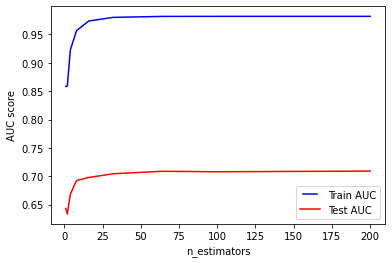

In [9]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.savefig('RandomForest best n_estimators.png', dpi=150)
plt.show()

C:\Users\dilip\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dilip\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dilip\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dilip\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dilip\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

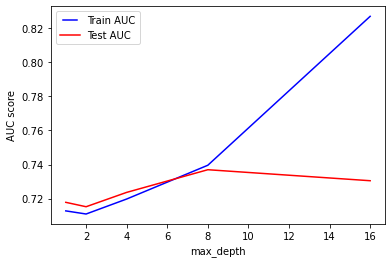

In [10]:
max_depth = [1, 2, 4, 8, 16]
train_results = []
test_results = []
for depth in max_depth:
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depth, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.savefig('RandomForest best max_depth.png', dpi=150)
plt.show()

In [4]:
#START:OWNCODE

In [11]:
rf_model = RandomForestClassifier()

In [14]:
parameters = {'n_estimators':[10],'max_depth':[4,6,8,9],'random_state':[42]}
grid_search_model = GridSearchCV(rf_model, parameters,cv=3,verbose=2,n_jobs=-1)
grid_search_model.fit(x_train, y_train)
y_pred = grid_search_model.predict(x_test)
print(accuracy_score(y_pred,y_test))

grid_search_model.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished


0.7352857142857143


{'max_depth': 9, 'n_estimators': 10, 'random_state': 42}

In [15]:
parameters = {'n_estimators':[12],'max_depth':[4,6,8,9],'random_state':[42]}
grid_search_model = GridSearchCV(rf_model, parameters,cv=3,verbose=2,n_jobs=-1)
grid_search_model.fit(x_train, y_train)
y_pred = grid_search_model.predict(x_test)
print(accuracy_score(y_pred,y_test))

grid_search_model.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.7s finished


0.7355714285714285


{'max_depth': 9, 'n_estimators': 12, 'random_state': 42}

In [16]:
parameters = {'n_estimators':[15],'max_depth':[4,6,8,9],'random_state':[42]}
grid_search_model = GridSearchCV(rf_model, parameters,cv=3,verbose=2,n_jobs=-1)
grid_search_model.fit(x_train, y_train)
y_pred = grid_search_model.predict(x_test)
print(accuracy_score(y_pred,y_test))

grid_search_model.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.8s finished


0.7363333333333333


{'max_depth': 9, 'n_estimators': 15, 'random_state': 42}

In [17]:
parameters = {'n_estimators':[20],'max_depth':[4,6,8,9],'random_state':[42]}
grid_search_model = GridSearchCV(rf_model, parameters,cv=3,verbose=2,n_jobs=-1)
grid_search_model.fit(x_train, y_train)
y_pred = grid_search_model.predict(x_test)
print(accuracy_score(y_pred,y_test))

grid_search_model.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.5s finished


0.7363809523809524


{'max_depth': 9, 'n_estimators': 20, 'random_state': 42}

In [18]:
parameters = {'n_estimators':[10,12,15,20],'max_depth':[4,6,8,9],'random_state':[42]}
grid_search_model = GridSearchCV(rf_model, parameters,cv=3,verbose=2,n_jobs=-1)
grid_search_model.fit(x_train, y_train)
y_pred = grid_search_model.predict(x_test)
print(accuracy_score(y_pred,y_test))

grid_search_model.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    5.2s finished


0.7363809523809524


{'max_depth': 9, 'n_estimators': 20, 'random_state': 42}

In [19]:
rf_model = RandomForestClassifier(max_depth=8, n_estimators=20, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

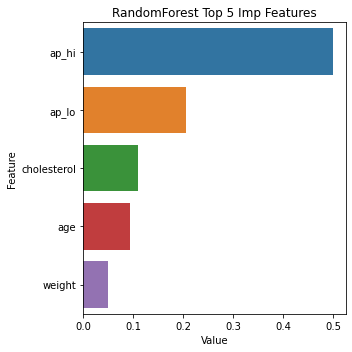

In [20]:
feature_imp = pd.DataFrame(sorted(zip(rf_model.feature_importances_,x.columns)), columns=['Value','Feature'])
feature_imp_top_10 = feature_imp.sort_values(by = 'Value',ascending=False).reset_index(drop=True)[:5]
plt.figure(figsize=(5, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp_top_10)
plt.title('RandomForest Top 5 Imp Features')
plt.tight_layout()
plt.savefig('RandomForest ROC', dpi=150)
plt.show()

In [21]:
y_pred_prob = rf_model.predict_proba(x_test)[:, 1]

In [5]:
#END:OWNCODE

<Figure size 432x288 with 0 Axes>

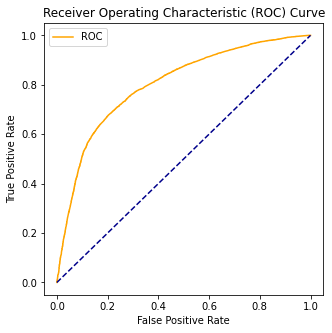

In [22]:
plt.figure(0).clf()
plt.figure(figsize=(5, 5))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)
plt.savefig('RandomForestROC', dpi=150)

In [23]:
confusion_matrix(y_test, y_pred)

array([[8341, 2120],
       [3416, 7123]], dtype=int64)